In [1]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,56,1,18,1,1,5,7622.786220
1,69,1,29,3,0,4,7493.402574
2,46,1,25,1,0,0,5157.571507
3,32,1,15,4,1,2,4371.029687
4,60,0,32,3,1,3,9319.361160


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     10000 non-null  int64  
 1   gênero    10000 non-null  int64  
 2   imc       10000 non-null  int64  
 3   filhos    10000 non-null  int64  
 4   fumante   10000 non-null  int64  
 5   região    10000 non-null  int64  
 6   encargos  10000 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 547.0 KB


array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='gênero', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>,
        <Axes: xlabel='filhos', ylabel='idade'>,
        <Axes: xlabel='fumante', ylabel='idade'>,
        <Axes: xlabel='região', ylabel='idade'>,
        <Axes: xlabel='encargos', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='gênero'>,
        <Axes: xlabel='gênero', ylabel='gênero'>,
        <Axes: xlabel='imc', ylabel='gênero'>,
        <Axes: xlabel='filhos', ylabel='gênero'>,
        <Axes: xlabel='fumante', ylabel='gênero'>,
        <Axes: xlabel='região', ylabel='gênero'>,
        <Axes: xlabel='encargos', ylabel='gênero'>],
       [<Axes: xlabel='idade', ylabel='imc'>,
        <Axes: xlabel='gênero', ylabel='imc'>,
        <Axes: xlabel='imc', ylabel='imc'>,
        <Axes: xlabel='filhos', ylabel='imc'>,
        <Axes: xlabel='fumante', ylabel='imc'>,
        <Axes: xlabel='região', ylabel='imc'>,
        <Axes: xlabel='encar

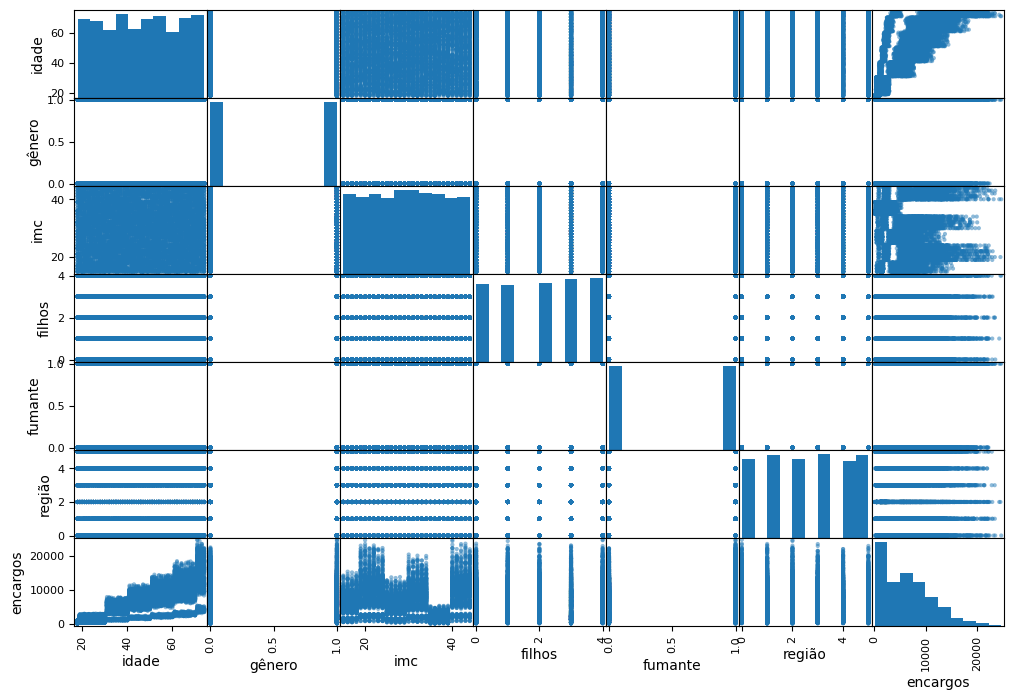

In [3]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12, 8))

In [14]:
rotulos = dados['encargos']
base    = dados.drop('encargos', axis=1)

rotulos

0        25666.362
1        16943.154
2        16775.400
3       136887.264
4        26169.624
           ...    
1137     16775.400
1138     17614.170
1139    103671.972
1140    125815.500
1141     17446.416
Name: encargos, Length: 1142, dtype: float64

Limpando os dados

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler



colunas= ['idade', 'gênero', 'imc', 'filhos', 'fumante', 'região']
colunas_numericas = ['idade',  'imc', 'filhos']
colunas_categorias = [ 'gênero', 'filhos', 'fumante', 'região']


pipeline = ColumnTransformer([
    ('valores nulos', SimpleImputer(strategy="median"), colunas_numericas ), 
    ('colunas string categorias', OrdinalEncoder(), colunas_categorias), 
    ('padronizacao da escala', StandardScaler(), colunas_numericas)
])

dados_limpos = pipeline.fit_transform(base)
dados_limpos


array([[ 5.60000000e+01,  2.90000000e+01,  2.00000000e+00, ...,
         9.93885658e-01, -3.29455819e-01, -3.20195640e-01],
       [ 4.60000000e+01,  2.50000000e+01,  1.00000000e+00, ...,
         2.22604453e-01, -1.02202562e+00, -9.15738672e-01],
       [ 3.20000000e+01,  2.30000000e+01,  0.00000000e+00, ...,
        -8.57189234e-01, -1.36831052e+00, -1.51128170e+00],
       ...,
       [ 5.60000000e+01,  3.40000000e+01,  3.00000000e+00, ...,
         9.93885658e-01,  5.36256434e-01,  2.75347391e-01],
       [ 2.50000000e+01,  3.50000000e+01,  0.00000000e+00, ...,
        -1.39708608e+00,  7.09398885e-01, -1.51128170e+00],
       [ 5.80000000e+01,  3.10000000e+01,  4.00000000e+00, ...,
         1.14814190e+00,  1.68290823e-02,  8.70890423e-01]])

Definindo calculo de mape

In [16]:
import numpy as np
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

Definindo impressao da analise

In [17]:

# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
# Avaliando o desempenho do modelo
def imprimaAnalise(label, predict):
    erro_medio_quadratico = mean_squared_error(label, predict)
    erro_absoluto_medio = mean_absolute_error(label, predict)
    r_quadrado = r2_score(label, predict)
    mape = calculate_mape(label, predict)
    lin_mse = mean_squared_error(label, predict)
    lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
    lin_rmse

    print(f"Erro Médio Quadrático: {erro_medio_quadratico:.4f}")
    print(f"Erro Absoluto Médio: {erro_absoluto_medio:.4f}")
    print(f"R² (coeficiente de determinação): {r_quadrado:.4f}")

    print(f"O MAPE(média abs do percentual de erro ) é: {mape:.4f}%")
    print(f"O MSE (erro médio) é: {lin_rmse:.2f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(label, predict, alpha=0.5)  # alpha é para transparência dos pontos
    plt.title('Gráfico de dispersão entre valores reais e previstos')
    plt.xlabel('Valores reais')
    plt.ylabel('Valores previstos')
    plt.grid(True)

    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(label)), label, color='blue', alpha=0.5, label='Valores reais')  # Pontos azuis para os valores reais
    plt.scatter(range(len(predict)), predict, color='red', alpha=0.5, label='Valores previstos')  # Pontos vermelhos para as previsões

    plt.title('Gráfico de dispersão entre valores reais e previstos com cores diferentes')
    plt.xlabel('Índice')
    plt.ylabel('Valores')
    plt.legend()  # Adiciona uma legenda para diferenciar
    plt.grid(True)
    plt.show()

Separando as bases em treinamento e teste

In [18]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(dados_limpos, rotulos, test_size=0.2, random_state=42)


Testando Regressao Linear

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Regressao Linear
Erro Médio Quadrático: 1205398668.5521
Erro Absoluto Médio: 27753.1236
R² (coeficiente de determinação): 0.7801
O MAPE(média abs do percentual de erro ) é: 79.4944%
O MSE (erro médio) é: 34718.85


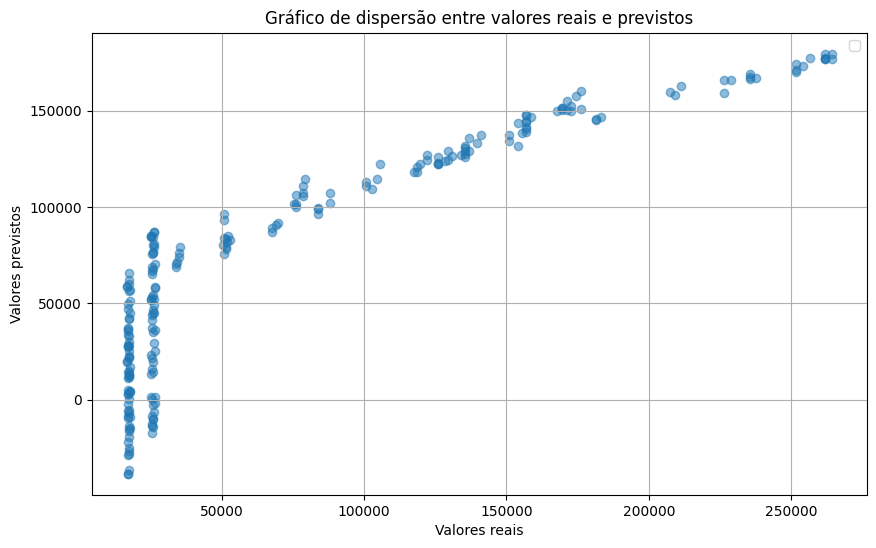

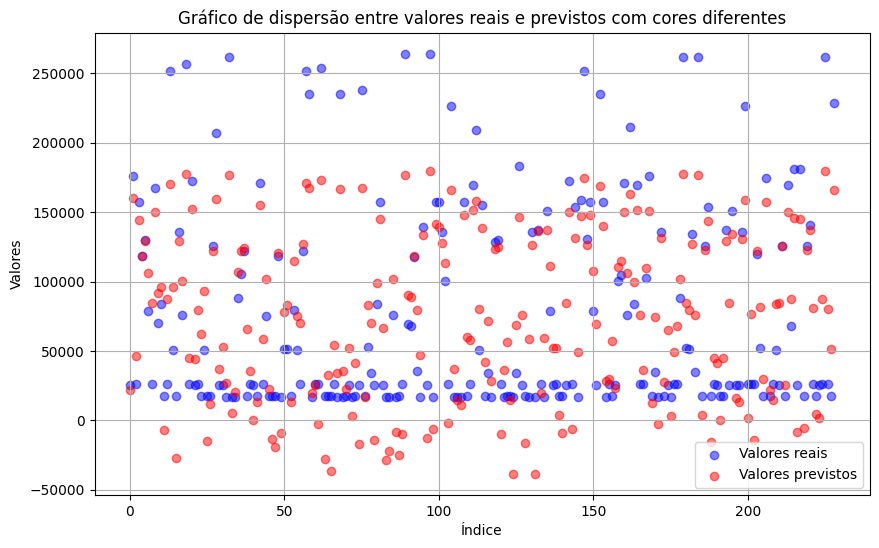

In [19]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)
previsoes = model.predict(X_test)
print("Regressao Linear")
imprimaAnalise(y_test, previsoes)


Testando arvore de decisao

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Arvore de Decisao
Erro Médio Quadrático: 54132.2650
Erro Absoluto Médio: 38.8252
R² (coeficiente de determinação): 1.0000
O MAPE(média abs do percentual de erro ) é: 0.0340%
O MSE (erro médio) é: 232.66


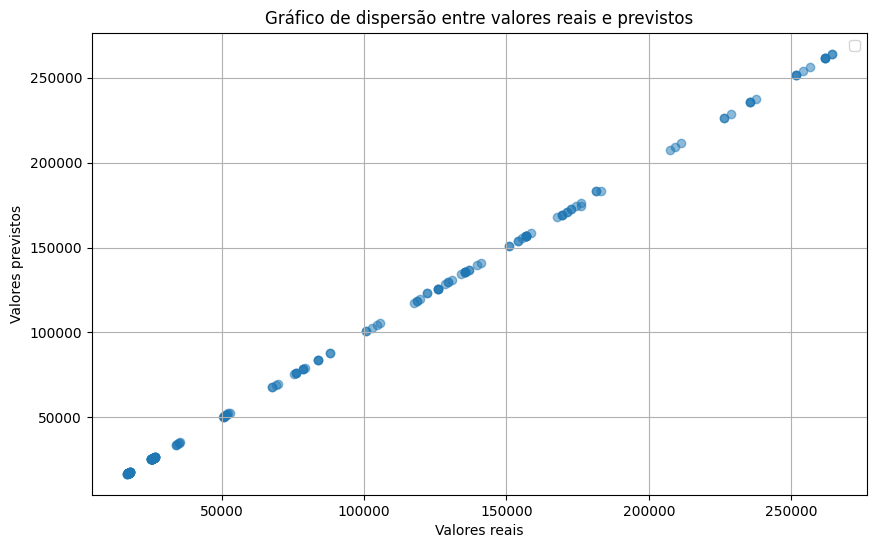

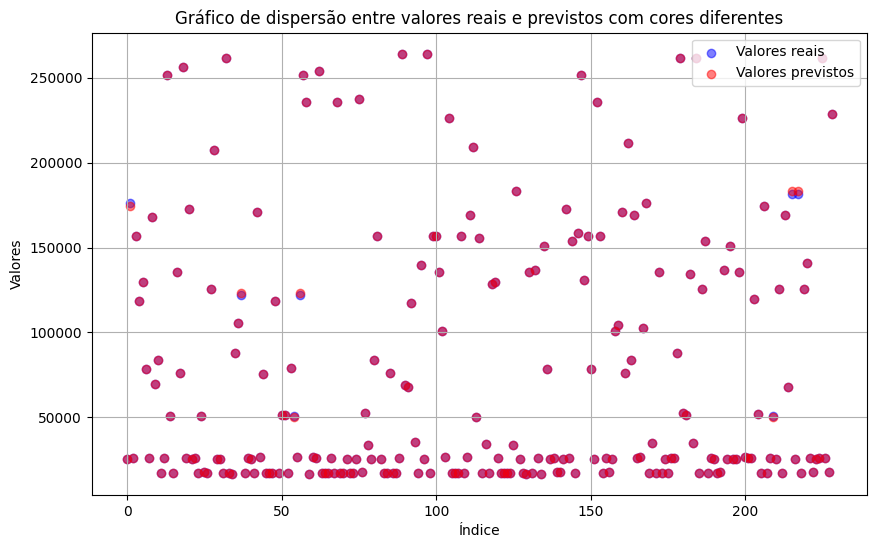

In [20]:
from sklearn.tree import DecisionTreeRegressor

model_tr = DecisionTreeRegressor(max_depth=10)
model_tr.fit(X_train, y_train)
previsoes_tr = model_tr.predict(X_test)
print("Arvore de Decisao")
imprimaAnalise(y_test, previsoes_tr)
